In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Cloning into 'yolov5'...
remote: Enumerating objects: 17360, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 17360 (delta 36), reused 18 (delta 18), pack-reused 17308 (from 2)
Receiving objects: 100% (17360/17360), 16.25 MiB | 29.35 MiB/s, done.
Resolving deltas: 100% (11901/11901), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 36.1 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
import os

DATASET_PATH = "/kaggle/input/construction-site-safety-image-dataset-roboflow" 
os.listdir(DATASET_PATH)


['css-data', 'source_files', 'results_yolov8n_100e']

In [3]:
import yaml
from pathlib import Path
data_config = {
    "path": str(DATASET_PATH),
    "train": "css-data/train",
    "val": "css-data/valid",
    "test": "css-data/test",
    "nc": 10,
    "names": ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask','NO-Safety Vest', 'Person', 'Safety Cone','Safety Vest', 'machinery', 'vehicle']
}

# Save `data.yaml`
data_yaml_path = Path("data.yaml")
with open(data_yaml_path, "w") as f:
    yaml.dump(data_config, f, default_flow_style=False)

# Verify file
print(data_yaml_path.read_text())


names:
- Hardhat
- Mask
- NO-Hardhat
- NO-Mask
- NO-Safety Vest
- Person
- Safety Cone
- Safety Vest
- machinery
- vehicle
nc: 10
path: /kaggle/input/construction-site-safety-image-dataset-roboflow
test: css-data/test
train: css-data/train
val: css-data/valid



In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
import logging

orig_torch_load = torch.load

def torch_wrapper(*args, **kwargs):
    logging.warning("[comfyui-unsafe-torch] I have unsafely patched `torch.load`.  The `weights_only` option of `torch.load` is forcibly disabled.")
    kwargs['weights_only'] = False

    return orig_torch_load(*args, **kwargs)

torch.load = torch_wrapper

NODE_CLASS_MAPPINGS = {}
__all__ = ['NODE_CLASS_MAPPINGS']

In [6]:
from ultralytics import YOLO

# Load a pre-trained YOLOv5 model (small version)
model = YOLO("yolov5s.pt")

# Train the model on the custom dataset
results = model.train(
    data=str(data_yaml_path),
    epochs=20,
    imgsz=640,
    batch=16,
    device="cuda" if torch.cuda.is_available() else "cpu",
    verbose=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 131MB/s] 


Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 48.2MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 181MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:07<00:00, 328.04it/s]

train: WARNING ⚠️ /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 244.95it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.21G      1.349      2.035      1.448        336        640: 100%|██████████| 163/163 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        114        697      0.693      0.477      0.529       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.23G      1.257      1.524      1.379        208        640: 100%|██████████| 163/163 [00:47<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        114        697      0.659      0.513      0.555      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.23G      1.235      1.448      1.359        252        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        114        697      0.751      0.464      0.551      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.23G      1.221      1.382      1.347        321        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        114        697      0.687      0.521      0.565       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.23G      1.185       1.31      1.328        293        640: 100%|██████████| 163/163 [00:46<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        114        697      0.644      0.566      0.594      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.23G      1.151      1.238      1.301        298        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        697      0.704      0.597      0.647      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.23G      1.129      1.189      1.285        264        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        114        697      0.752      0.587      0.645      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.23G      1.102      1.136      1.267        352        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        114        697      0.813      0.588      0.676      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.23G       1.08      1.086      1.252        344        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        114        697      0.839      0.641      0.713      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.23G       1.06      1.033      1.234        172        640: 100%|██████████| 163/163 [00:46<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        114        697      0.795      0.673      0.737      0.384


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.23G      1.097     0.9717      1.254        133        640: 100%|██████████| 163/163 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        114        697      0.805      0.658      0.707      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.23G      1.075     0.9266      1.241        144        640: 100%|██████████| 163/163 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        114        697      0.802      0.669      0.742      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.23G      1.045     0.8768      1.222        214        640: 100%|██████████| 163/163 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        114        697      0.849      0.678      0.762      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.23G      1.011     0.8283      1.194        155        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        114        697      0.853      0.669      0.754      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.23G     0.9971     0.8083      1.191        140        640: 100%|██████████| 163/163 [00:45<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        114        697      0.854      0.683      0.776      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.23G     0.9697     0.7694      1.173        134        640: 100%|██████████| 163/163 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        114        697      0.843      0.695      0.779      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.23G      0.943     0.7312       1.15        240        640: 100%|██████████| 163/163 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]

                   all        114        697      0.842      0.716      0.783      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.23G      0.922     0.7082      1.137        127        640: 100%|██████████| 163/163 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        114        697      0.877      0.706      0.798      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.23G     0.9026     0.6871      1.126        156        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        114        697      0.912      0.711      0.808      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.23G     0.8761      0.661      1.109        141        640: 100%|██████████| 163/163 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        114        697      0.904      0.712      0.808      0.476



20 epochs completed in 0.267 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 84 layers, 9,115,406 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]


                   all        114        697      0.903      0.713      0.809      0.476
               Hardhat         42         79      0.952      0.752      0.876      0.544
                  Mask         19         21      0.966       0.81      0.937      0.591
            NO-Hardhat         37         69       0.87      0.565      0.713       0.35
               NO-Mask         44         74      0.824      0.568      0.631      0.311
        NO-Safety Vest         56        106      0.915      0.607      0.747      0.419
                Person         84        166      0.903       0.73      0.812      0.485
           Safety Cone         13         44      0.957      0.864       0.91      0.489
           Safety Vest         28         41       0.97      0.776       0.89      0.555
             machinery         26         55      0.827      0.909      0.944      0.614
               vehicle         16         42      0.852      0.549      0.626      0.405


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.3ms inference, 0.0ms loss, 10.3ms postprocess per image
Results saved to runs/detect/train


In [7]:
# Evaluate model performance using test dataset
metrics = model.val(
    data=str(data_yaml_path),
    task="test",
    imgsz=640
)

# Print the mAP (Mean Average Precision)
print(f"mAP@50: {metrics.box.map50:.3f}")
print(f"mAP@50-95: {metrics.box.map:.3f}")


Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv5s summary (fused): 84 layers, 9,115,406 parameters, 0 gradients, 23.8 GFLOPs


val: Scanning /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 552.07it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


                   all        114        697      0.903      0.714      0.808      0.476
               Hardhat         42         79      0.952      0.752      0.875      0.548
                  Mask         19         21      0.966       0.81      0.937      0.591
            NO-Hardhat         37         69       0.87      0.565      0.715      0.353
               NO-Mask         44         74      0.817      0.568      0.631      0.309
        NO-Safety Vest         56        106      0.915      0.608      0.747      0.421
                Person         84        166      0.902      0.735      0.813      0.484
           Safety Cone         13         44      0.957      0.864      0.902      0.485
           Safety Vest         28         41       0.97      0.776      0.889      0.555
             machinery         26         55      0.827      0.909      0.945      0.616
               vehicle         16         42      0.853      0.551      0.624      0.402


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 2.6ms preprocess, 6.3ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to runs/test/train
mAP@50: 0.808
mAP@50-95: 0.476



image 1/1 /kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 4 Hardhats, 3 NO-Hardhats, 2 NO-Masks, 4 Persons, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


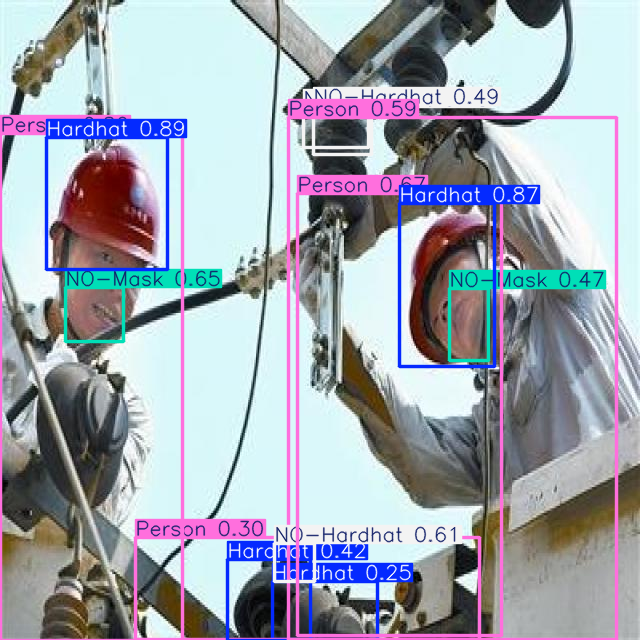

In [8]:
image_path = "/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg" 
results = model(image_path)


results[0].show()
